Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Import the data from a csv file into a pandas dataframe

In [2]:
User = pd.read_csv('https://raw.githubusercontent.com/AyeleK/Users-Behavior-Prediction/refs/heads/main/user_behavior_dataset%20(1).csv')
User


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


take a peek at the dataset

In [3]:
User

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


we will generate a correlation matrix

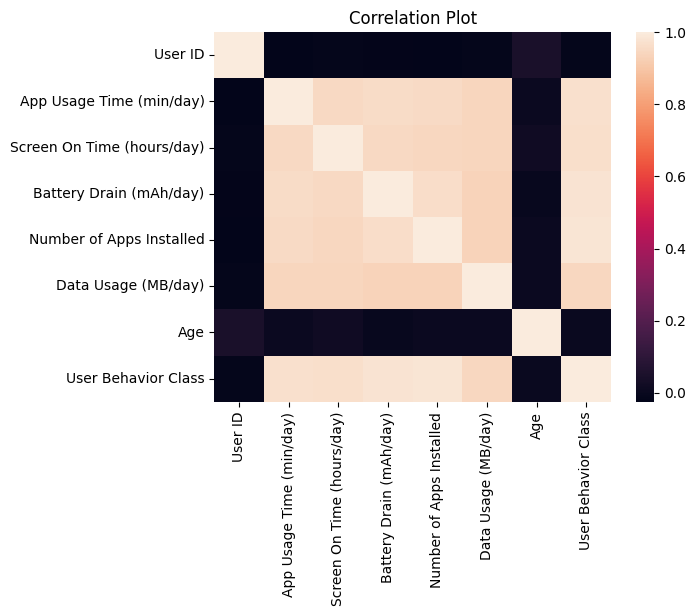

In [4]:
# Select only numerical features for correlation analysis.
numerical_features = User.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical features.
sns.heatmap(numerical_features.corr())
plt.title('Correlation Plot')
plt.show()


What features do we have in our dataset?

In [5]:
User.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

How much data do we have

In [6]:
User.shape

(700, 11)

What data type do we have?

In [7]:
User.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


Do we have any missing values?

In [8]:
User.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


How does the device vary?

In [9]:
print(User['Device Model'].value_counts())

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64


How does the Operating System vary?

In [10]:
print(User['Operating System'].value_counts())

Operating System
Android    554
iOS        146
Name: count, dtype: int64


How does the Gender vary?

In [11]:
print(User['Gender'].value_counts())

Gender
Male      364
Female    336
Name: count, dtype: int64


Visualize the distribution of device types

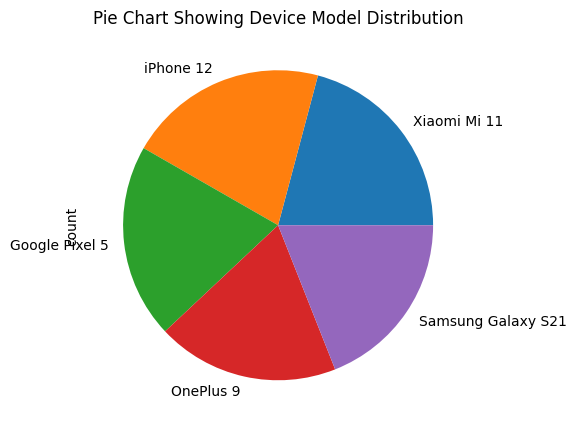

In [12]:
Device_Model_count = User['Device Model'].value_counts()
plt.figure(figsize= (5,10))
Device_Model_count.plot.pie(title= 'Pie Chart Showing Device Model Distribution')
plt.show()

Visualize the distribution of the operating system types

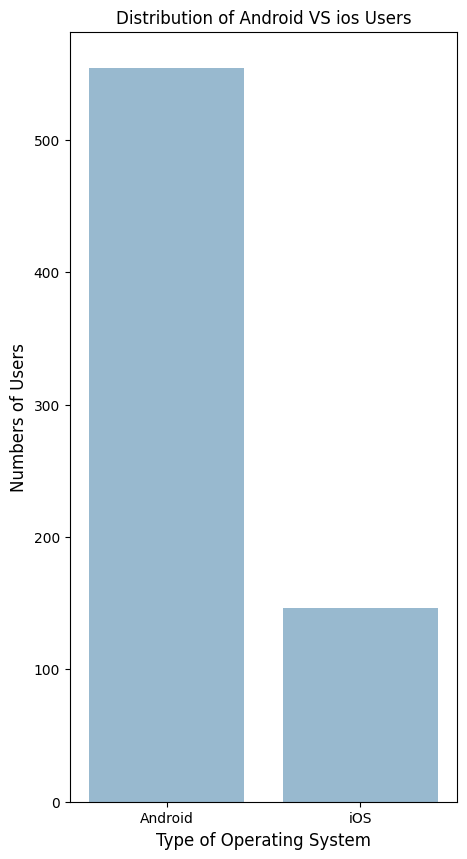

In [13]:
Operating_System_count = User['Operating System'].value_counts()
plt.figure(figsize= (5,10))
sns.barplot(x=Operating_System_count.index, y=Operating_System_count.values, alpha= 0.5)
plt.title('Distribution of Android VS ios Users')
plt.ylabel('Numbers of Users', fontsize= 12)
plt.xlabel('Type of Operating System', fontsize= 12)
plt.show()

Visualize the Device Model types

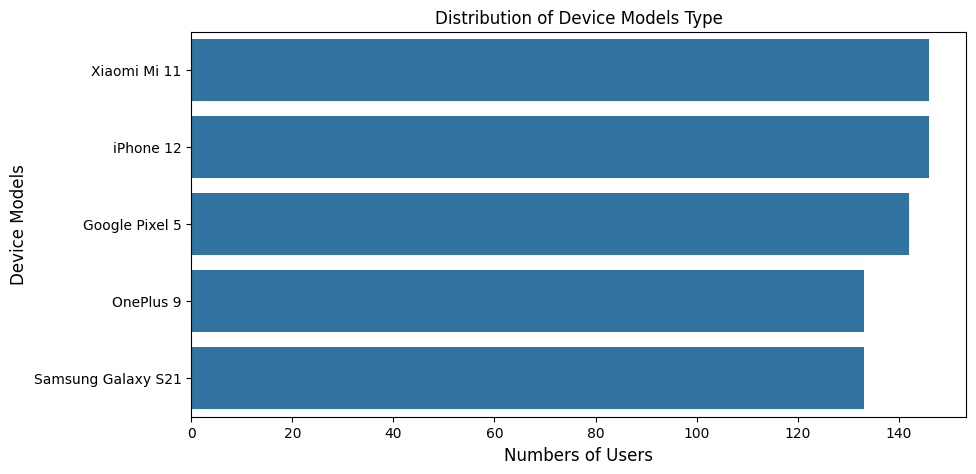

In [14]:
Device_Model_count = User['Device Model'].value_counts()
plt.figure(figsize= (10, 5))
sns.barplot(x=Device_Model_count.values, y=Device_Model_count.index, alpha= 1, orient= 'h')
plt.title('Distribution of Device Models Type')
plt.ylabel('Device Models', fontsize= 12)
plt.xlabel('Numbers of Users', fontsize= 12)
plt.show()


Lets take another look at the dataset. We need to do one hot encoding for the categorical columns - Device Model, Operating system, Gender

In [15]:
User

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


Device Model

In [16]:
Device_Model_encoding = pd.get_dummies(User['Device Model'])
Device_Model_encoding

,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12
0,True,False,False,False,False
1,False,True,False,False,False
2,False,False,False,True,False
3,True,False,False,False,False
4,False,False,False,False,True
...,...,...,...,...,...
695,False,False,False,False,True
696,False,False,False,True,False
697,True,False,False,False,False
698,False,False,True,False,False


Now we can drop the original device model column that we have done the encoding

In [17]:
User = User.drop('Device Model', axis= 1)
User

,User ID,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Android,393,6.4,1872,67,1122,40,Male,4
1,2,Android,268,4.7,1331,42,944,47,Female,3
2,3,Android,154,4.0,761,32,322,42,Male,2
3,4,Android,239,4.8,1676,56,871,20,Male,3
4,5,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...
695,696,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Android,99,3.1,942,22,457,50,Female,2
698,699,Android,62,1.7,431,13,224,44,Male,1


Join the encoded device model column to the original dataframe. Note - this can also be done using concat()

In [18]:
User = User.join(Device_Model_encoding)
User

,User ID,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12
0,1,Android,393,6.4,1872,67,1122,40,Male,4,True,False,False,False,False
1,2,Android,268,4.7,1331,42,944,47,Female,3,False,True,False,False,False
2,3,Android,154,4.0,761,32,322,42,Male,2,False,False,False,True,False
3,4,Android,239,4.8,1676,56,871,20,Male,3,True,False,False,False,False
4,5,iOS,187,4.3,1367,58,988,31,Female,3,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,iOS,92,3.9,1082,26,381,22,Male,2,False,False,False,False,True
696,697,Android,316,6.8,1965,68,1201,59,Male,4,False,False,False,True,False
697,698,Android,99,3.1,942,22,457,50,Female,2,True,False,False,False,False
698,699,Android,62,1.7,431,13,224,44,Male,1,False,False,True,False,False


In [19]:
Operating_System_encoding = pd.get_dummies(User['Operating System'], drop_first= True)
Operating_System_encoding

,iOS
0,False
1,False
2,False
3,False
4,True
...,...
695,True
696,False
697,False
698,False


In [20]:
User = User.drop('Operating System', axis= 1)
User

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12
0,1,393,6.4,1872,67,1122,40,Male,4,True,False,False,False,False
1,2,268,4.7,1331,42,944,47,Female,3,False,True,False,False,False
2,3,154,4.0,761,32,322,42,Male,2,False,False,False,True,False
3,4,239,4.8,1676,56,871,20,Male,3,True,False,False,False,False
4,5,187,4.3,1367,58,988,31,Female,3,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,92,3.9,1082,26,381,22,Male,2,False,False,False,False,True
696,697,316,6.8,1965,68,1201,59,Male,4,False,False,False,True,False
697,698,99,3.1,942,22,457,50,Female,2,True,False,False,False,False
698,699,62,1.7,431,13,224,44,Male,1,False,False,True,False,False


In [21]:
User = User.join(Operating_System_encoding)
User

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12,iOS
0,1,393,6.4,1872,67,1122,40,Male,4,True,False,False,False,False,False
1,2,268,4.7,1331,42,944,47,Female,3,False,True,False,False,False,False
2,3,154,4.0,761,32,322,42,Male,2,False,False,False,True,False,False
3,4,239,4.8,1676,56,871,20,Male,3,True,False,False,False,False,False
4,5,187,4.3,1367,58,988,31,Female,3,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,92,3.9,1082,26,381,22,Male,2,False,False,False,False,True,True
696,697,316,6.8,1965,68,1201,59,Male,4,False,False,False,True,False,False
697,698,99,3.1,942,22,457,50,Female,2,True,False,False,False,False,False
698,699,62,1.7,431,13,224,44,Male,1,False,False,True,False,False,False


In [22]:
Gender_encoding = pd.get_dummies(User['Gender'], drop_first= True)
Gender_encoding

,Male
0,True
1,False
2,True
3,True
4,False
...,...
695,True
696,True
697,False
698,True


In [23]:
User = User.drop('Gender', axis= 1)
User

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12,iOS
0,1,393,6.4,1872,67,1122,40,4,True,False,False,False,False,False
1,2,268,4.7,1331,42,944,47,3,False,True,False,False,False,False
2,3,154,4.0,761,32,322,42,2,False,False,False,True,False,False
3,4,239,4.8,1676,56,871,20,3,True,False,False,False,False,False
4,5,187,4.3,1367,58,988,31,3,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,92,3.9,1082,26,381,22,2,False,False,False,False,True,True
696,697,316,6.8,1965,68,1201,59,4,False,False,False,True,False,False
697,698,99,3.1,942,22,457,50,2,True,False,False,False,False,False
698,699,62,1.7,431,13,224,44,1,False,False,True,False,False,False


In [24]:
User = User.join(Gender_encoding)
User

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12,iOS,Male
0,1,393,6.4,1872,67,1122,40,4,True,False,False,False,False,False,True
1,2,268,4.7,1331,42,944,47,3,False,True,False,False,False,False,False
2,3,154,4.0,761,32,322,42,2,False,False,False,True,False,False,True
3,4,239,4.8,1676,56,871,20,3,True,False,False,False,False,False,True
4,5,187,4.3,1367,58,988,31,3,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,92,3.9,1082,26,381,22,2,False,False,False,False,True,True,True
696,697,316,6.8,1965,68,1201,59,4,False,False,False,True,False,False,True
697,698,99,3.1,942,22,457,50,2,True,False,False,False,False,False,False
698,699,62,1.7,431,13,224,44,1,False,False,True,False,False,False,True


We will now seperate our data into features (X) and target (y).
We will not consider User ID and User behavior class.

In [25]:
x = User.drop(['User Behavior Class', 'User ID'], axis= 1)
y = User['User Behavior Class']

In [26]:
print(x['Age'].value_counts)

<bound method IndexOpsMixin.value_counts of 0      40
1      47
2      42
3      20
4      31
       ..
695    22
696    59
697    50
698    44
699    23
Name: Age, Length: 700, dtype: int64>


Take a look at our behaviors set

In [27]:
x

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Google Pixel 5,OnePlus 9,Samsung Galaxy S21,Xiaomi Mi 11,iPhone 12,iOS,Male
0,393,6.4,1872,67,1122,40,True,False,False,False,False,False,True
1,268,4.7,1331,42,944,47,False,True,False,False,False,False,False
2,154,4.0,761,32,322,42,False,False,False,True,False,False,True
3,239,4.8,1676,56,871,20,True,False,False,False,False,False,True
4,187,4.3,1367,58,988,31,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,92,3.9,1082,26,381,22,False,False,False,False,True,True,True
696,316,6.8,1965,68,1201,59,False,False,False,True,False,False,True
697,99,3.1,942,22,457,50,True,False,False,False,False,False,False
698,62,1.7,431,13,224,44,False,False,True,False,False,False,True


Take a look at our labels

In [28]:
y

,User Behavior Class
0,4
1,3
2,2
3,3
4,3
...,...
695,2
696,4
697,2
698,1


Spliting the dataset into training and test sets in the ratio 70/30

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.39, random_state= 2)


Create the model and fit (train) on the training data

In [30]:
from sklearn.linear_model import LinearRegression

#Load the linear regression model
LR = LinearRegression()

LR.fit(x_train, y_train)

LinearRegression()

Make Predictions on the test data

In [31]:
#model evaluation
#let's test our model on our test data
y_pred = LR.predict(x_test)

Calculating the Coefficients

In [32]:
coeffiecient = LR.coef_
print(f'Coeffiecients {coeffiecient}')

Coeffiecients [ 1.22097654e-03  6.80634421e-02  5.12299146e-04  1.88146584e-02
  9.65651689e-05 -1.15210814e-03 -2.13514423e-02  8.76191863e-03
  5.33846879e-03  3.30401912e-03  3.94703573e-03  3.94703573e-03
 -2.25911765e-02]


Calculate the intercept

In [33]:
intercept = LR.intercept_
print(f'Intercept {intercept}')

Intercept 0.5313177212574027


Calculating R-Square

In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2 {r2}')

R2 0.984141719182147


Calculating the MSE

In [35]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE {mse}')

MSE 0.03118333494905322


Calculating RMSE

In [36]:
import math
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
#rmse = mean_squared_error(y_test, y_pred, square= False)
print(f'RMSE {rmse}')

RMSE 0.17658803738943707


Calculating the MAE

In [37]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE {mae}')

MAE 0.1476217335814314


In [38]:
y_pred

array([3.0635073 , 3.91966641, 1.7646328 , 1.16840302, 2.17310859,
       2.86518934, 3.89723777, 2.90449449, 1.09091412, 3.69124107,
       3.9623378 , 4.22841057, 5.40985606, 1.0288571 , 1.21358728,
       4.9673939 , 1.82340133, 2.82875884, 1.17235212, 5.13241073,
       1.15422952, 4.07530174, 5.29917767, 5.17803189, 2.0103424 ,
       3.75054282, 2.69629378, 3.76045338, 1.28506297, 2.87564545,
       2.9322168 , 4.88014194, 3.94203025, 2.00068768, 2.68155874,
       1.08403602, 2.88490975, 2.9270823 , 3.08172463, 4.01800819,
       1.96738376, 1.99448312, 3.81185261, 1.77882061, 3.81234906,
       5.074486  , 2.87029577, 1.93152497, 2.74950104, 3.9165026 ,
       1.97984977, 3.84040137, 1.2897767 , 2.140529  , 1.88001952,
       1.77882683, 4.9863424 , 3.96554518, 2.86267359, 3.20008276,
       3.82923701, 4.06914783, 1.81161711, 5.30046021, 5.43542251,
       1.8310359 , 2.95548393, 3.91332471, 1.86807207, 2.03610538,
       1.9422846 , 2.03266823, 2.13374117, 4.39458472, 3.69284

Export the model as pickle

In [39]:
import pickle
with open('user_behavior_prediction_model.pkl', 'wb') as f:
    pickle.dump(LR, f)